In [6]:
%matplotlib inline

# Dealing with unbalanced datasets

In [7]:
!pip install imblearn

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_moons


In [9]:
def showScatter(X, y, title="scatter", s=200):

    figure = plt.figure(figsize=(27, 27))
    figure.suptitle(title, fontsize=60)

    h = .02  # step size in the mesh

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1, 1, 1)
    #ax.set_title(title, fontsize=60)
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k', s=s)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    #i += 1

    plt.tight_layout()
    plt.show()

## First we create our dataset 

In [10]:
n_samples = 2000
mydataset = make_moons(n_samples=n_samples, noise=0.1, random_state=0)

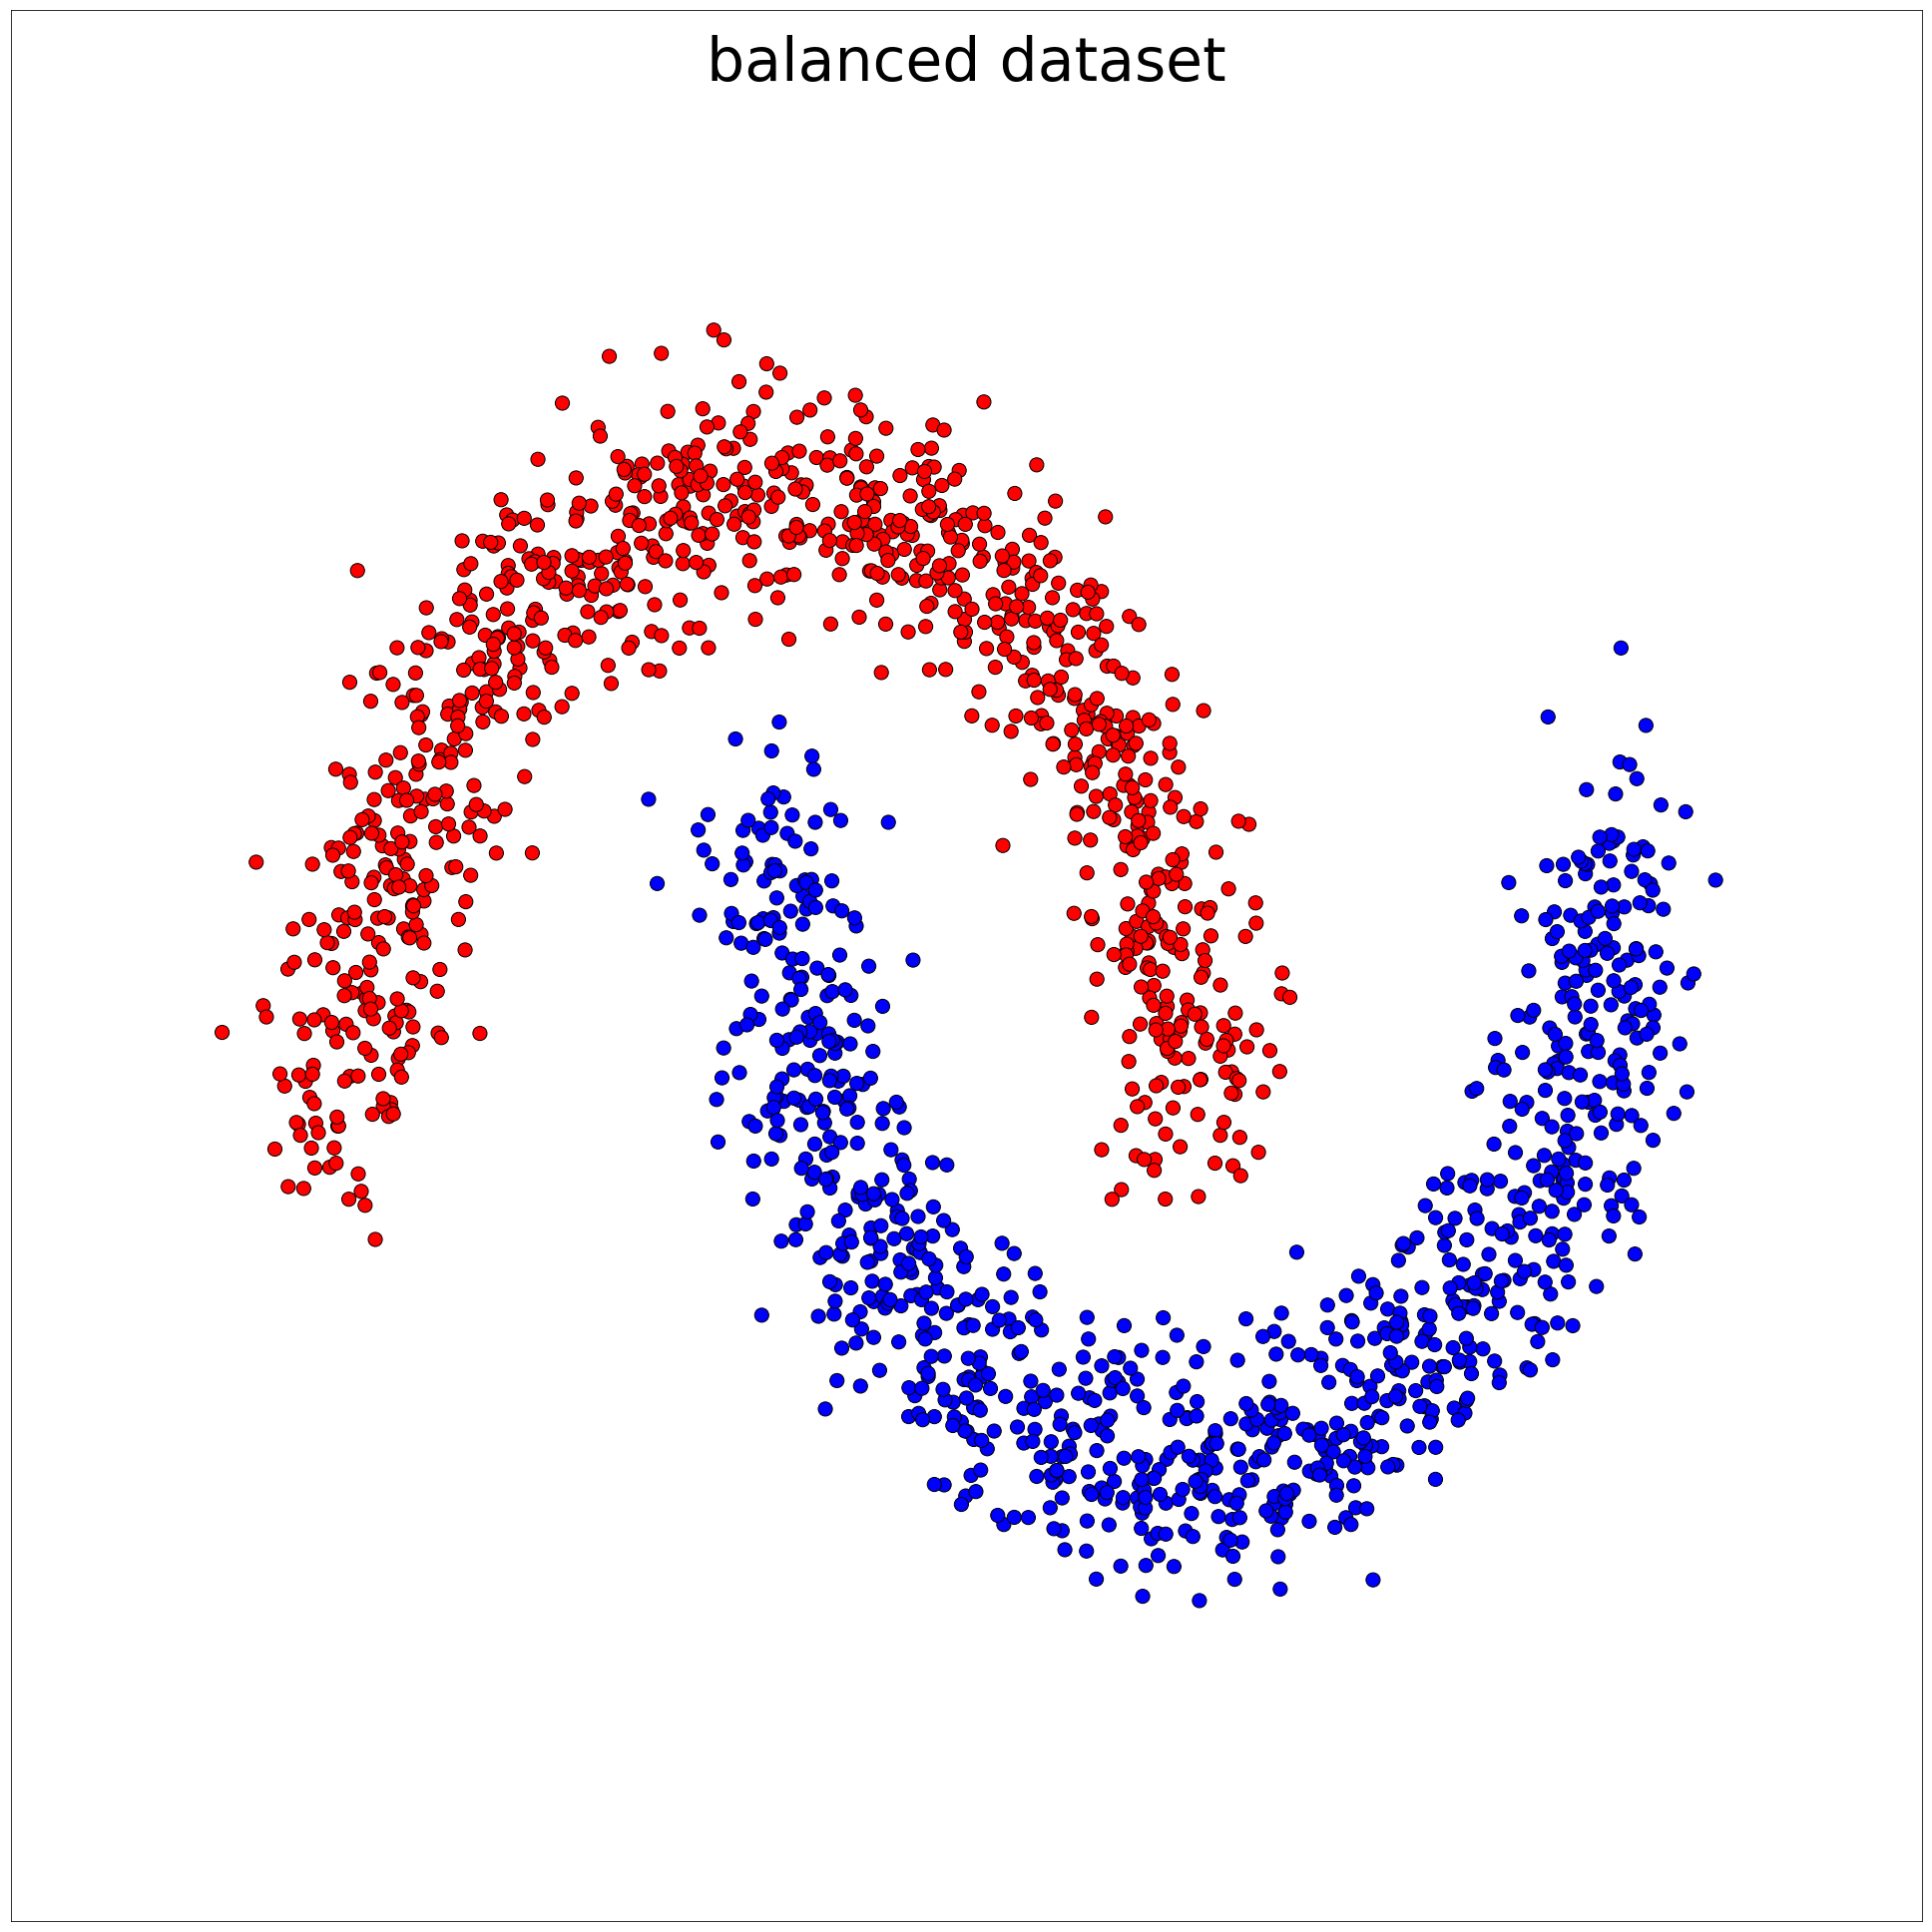

In [11]:
X_train = mydataset[0]
y_train = mydataset[1]
showScatter(X_train, y_train, title="balanced dataset", s=200)

## We then remove data to create an imbalance 

In [12]:

X_train = mydataset[0]
y_train = mydataset[1]

newX = []
newY = []
for i in range(0, n_samples):
    #print("-----> ", i)
    #print("X: ", type(X_train[i]), X_train[i])
    #print("y: ", type(y_train[i]), y_train[i])
    if y_train[i] == 0:
        newX.append(list(X_train[i]))
        newY.append(y_train[i])
        #print("NA....")
    elif random.uniform(0, 1) < 0.05 and y_train[i] == 1:
        newX.append(list(X_train[i]))
        newY.append(y_train[i])
        #print("adding.... ", X_train[i])
    else:
        #print("skipping ...", X_train[i])
        pass

newX = np.array(newX)
X_train = newX
y_train = newY
X = X_train
y = y_train
#print(y)

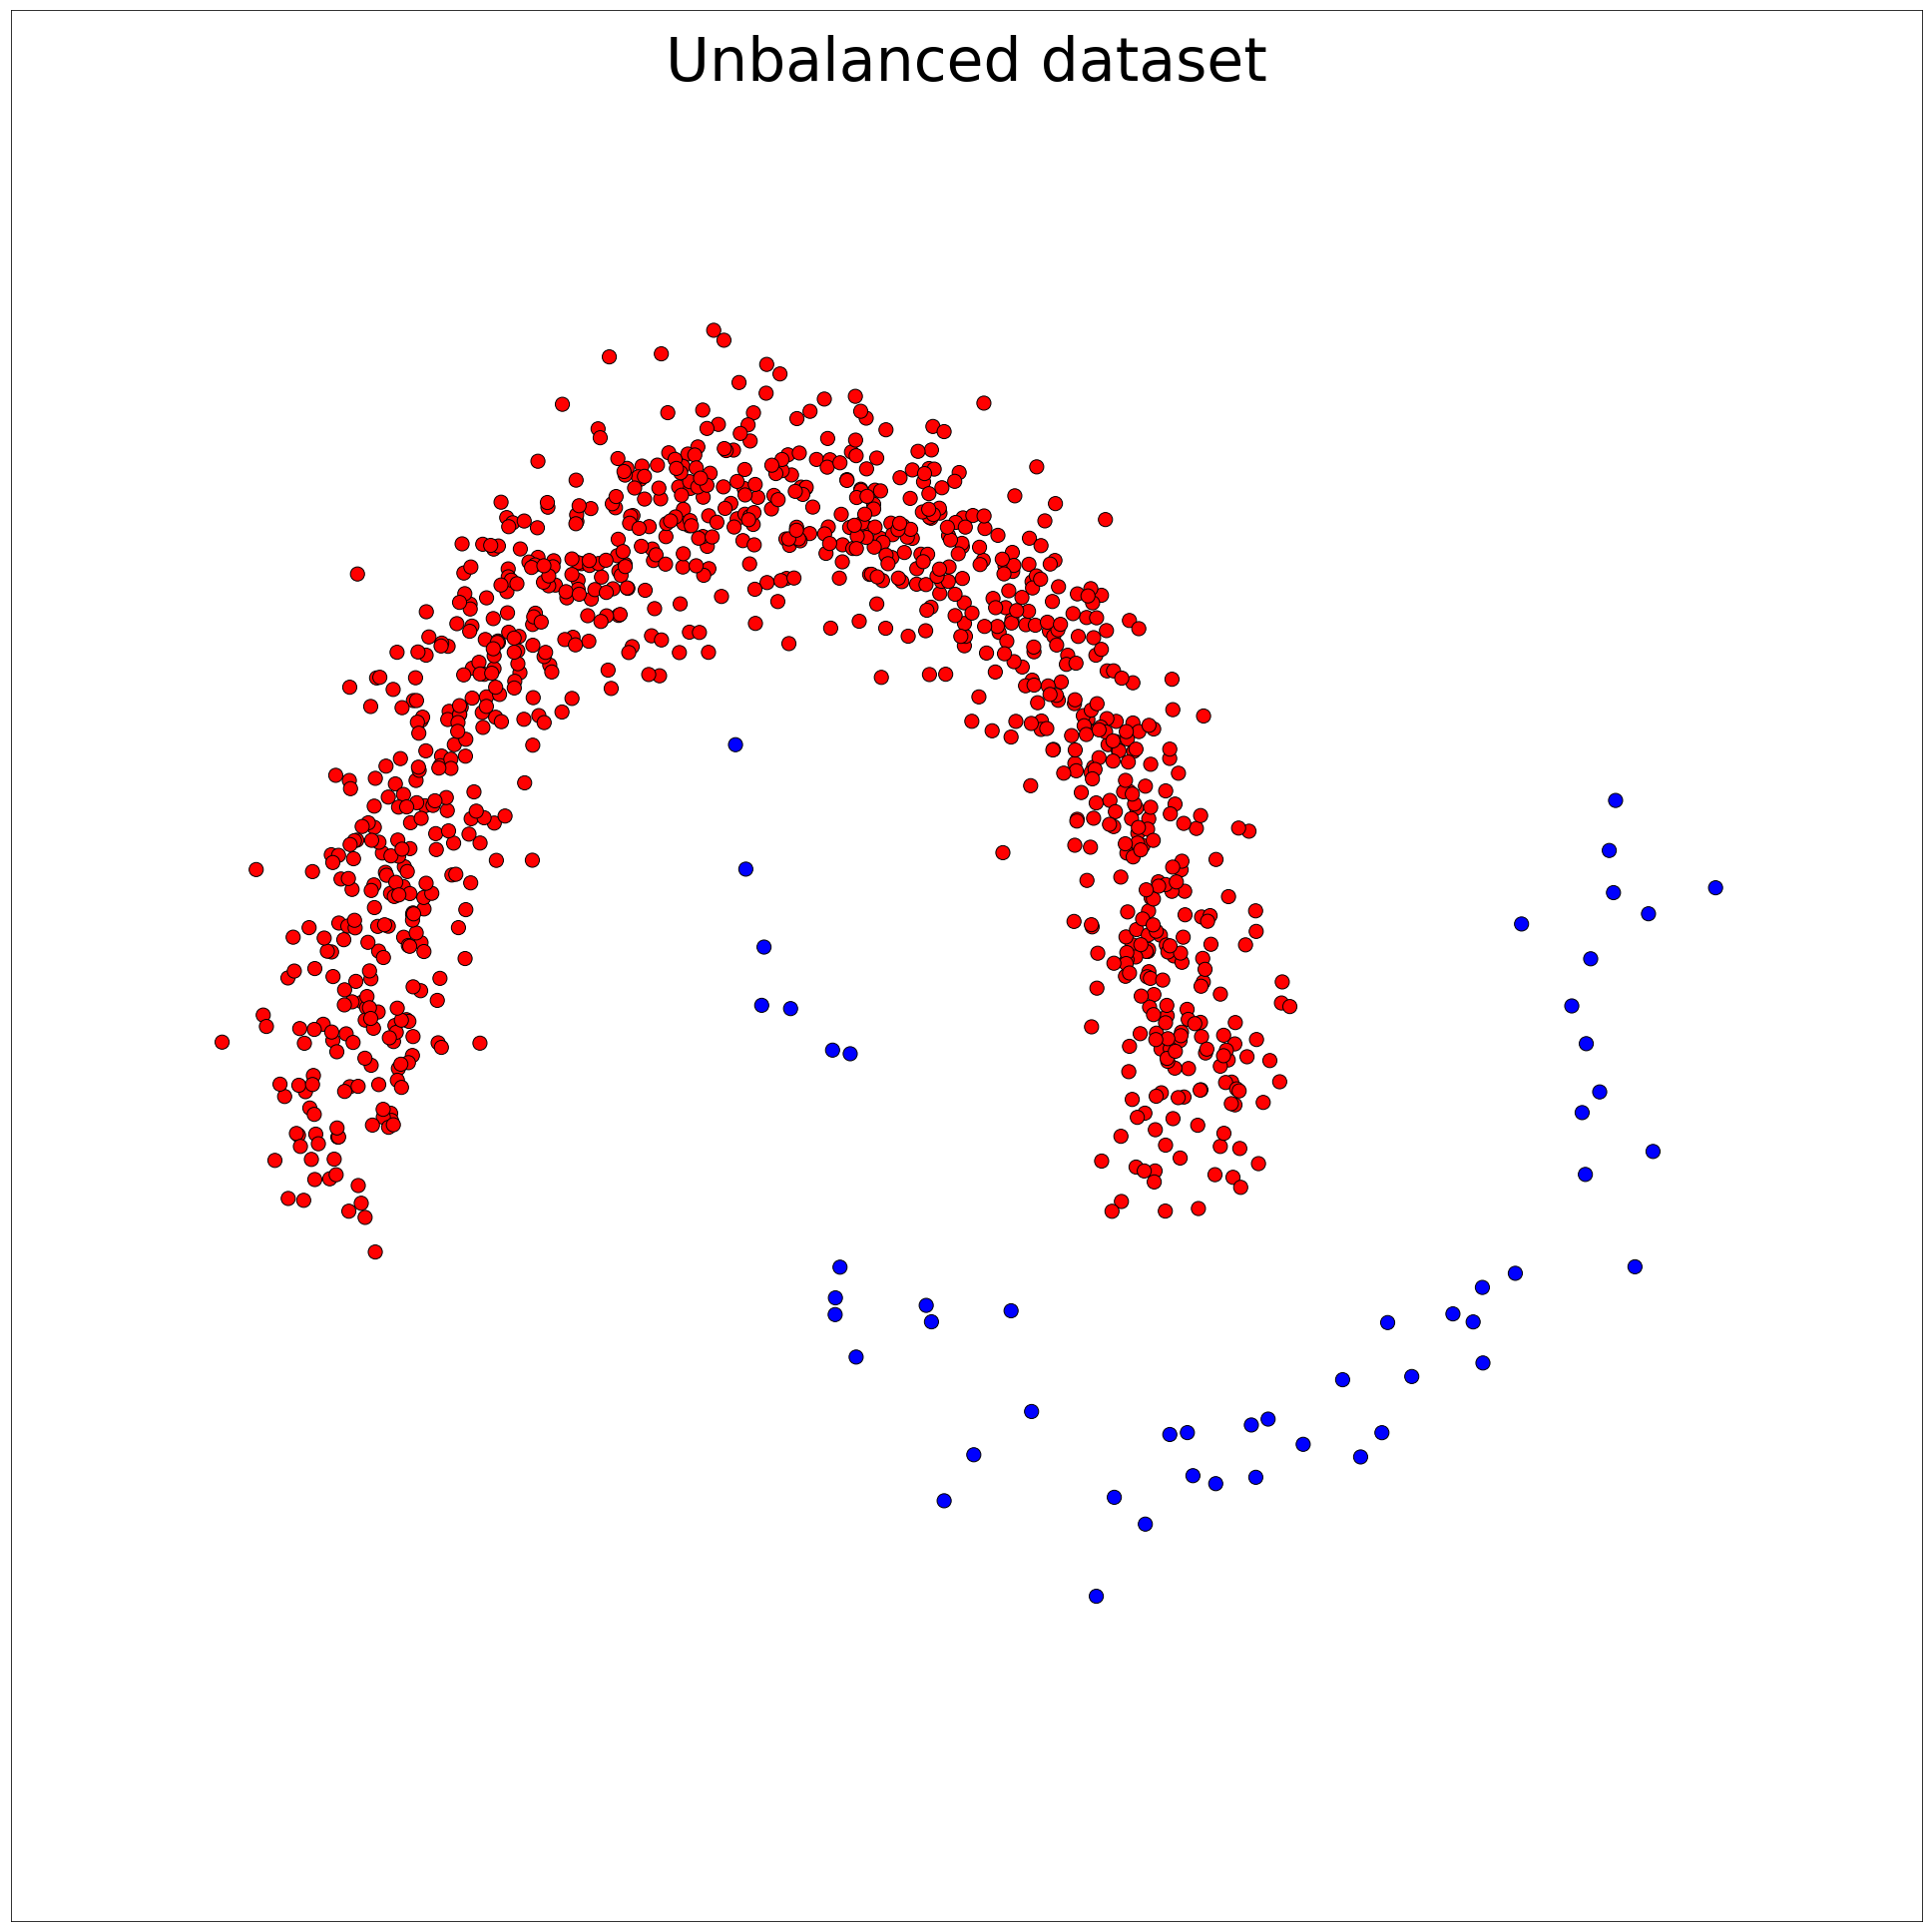

In [13]:
showScatter(X_train, y_train, title="Unbalanced dataset", s=200)

#print("original: ", mydataset[0])
#print("new: ", X)

## Now we use SMOTE to create artificial data

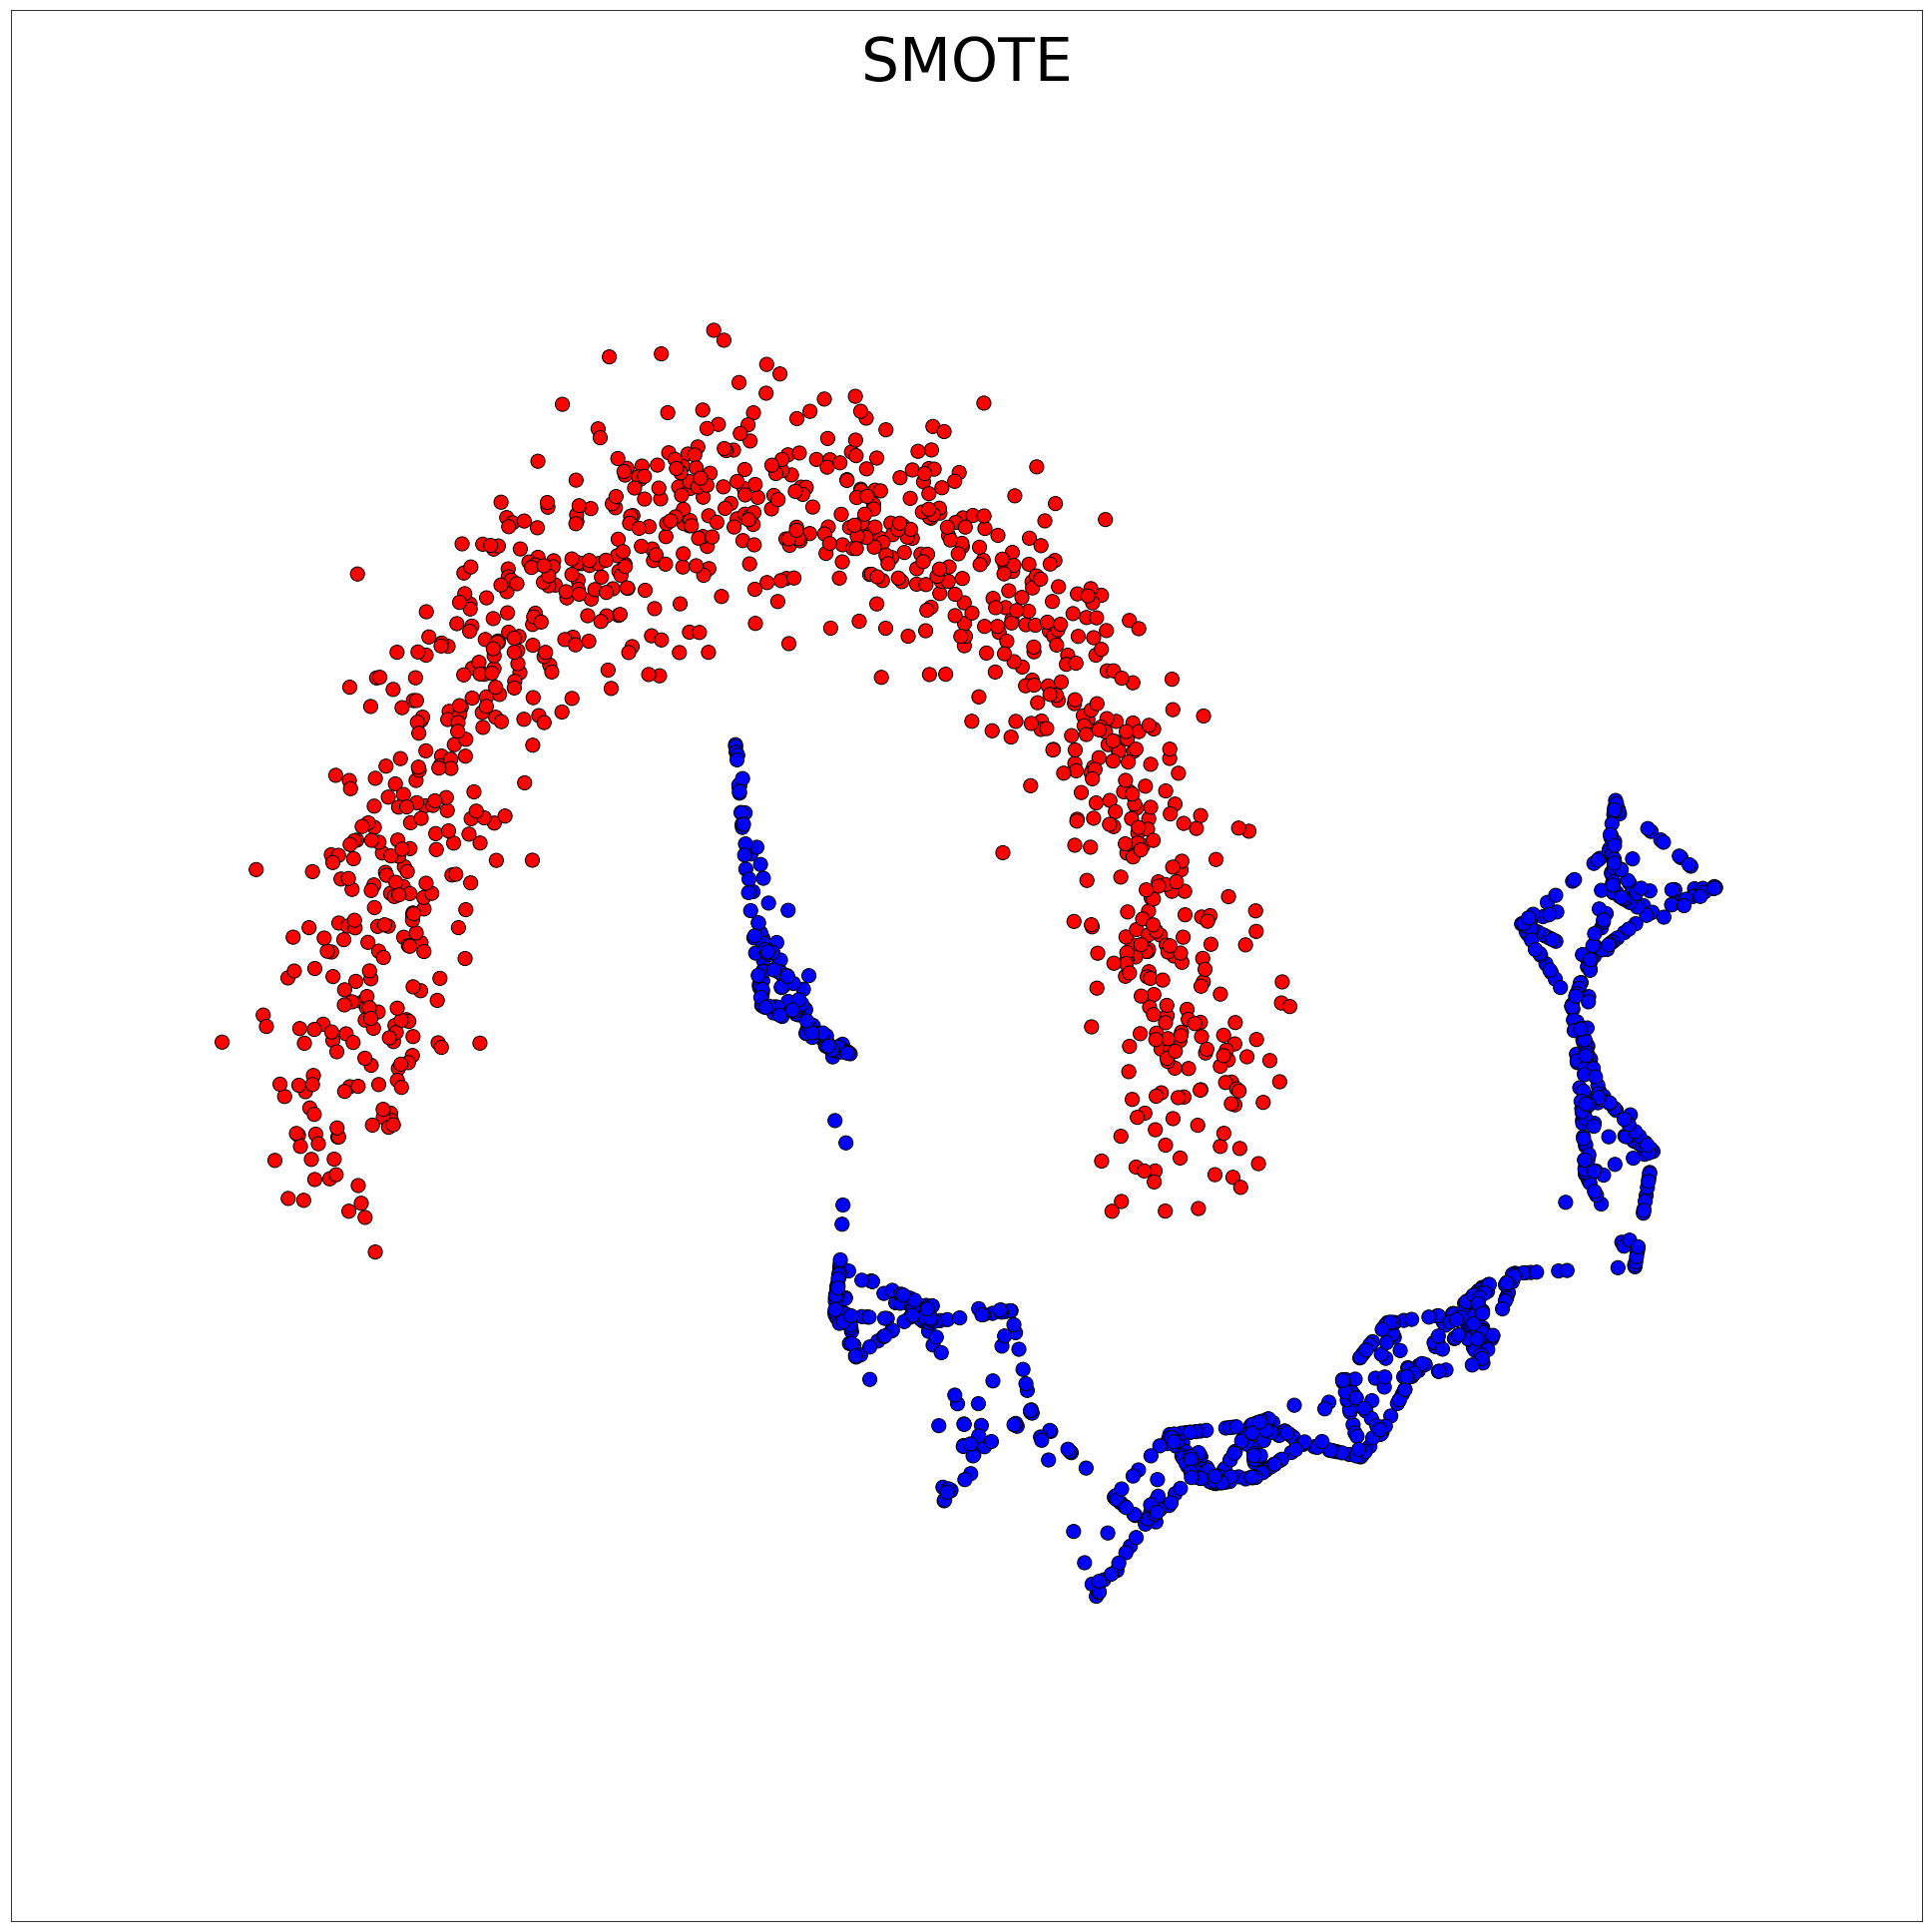

In [14]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
showScatter(X_smote, y_smote, title="SMOTE", s=200)

## Here we try something else - undersampling

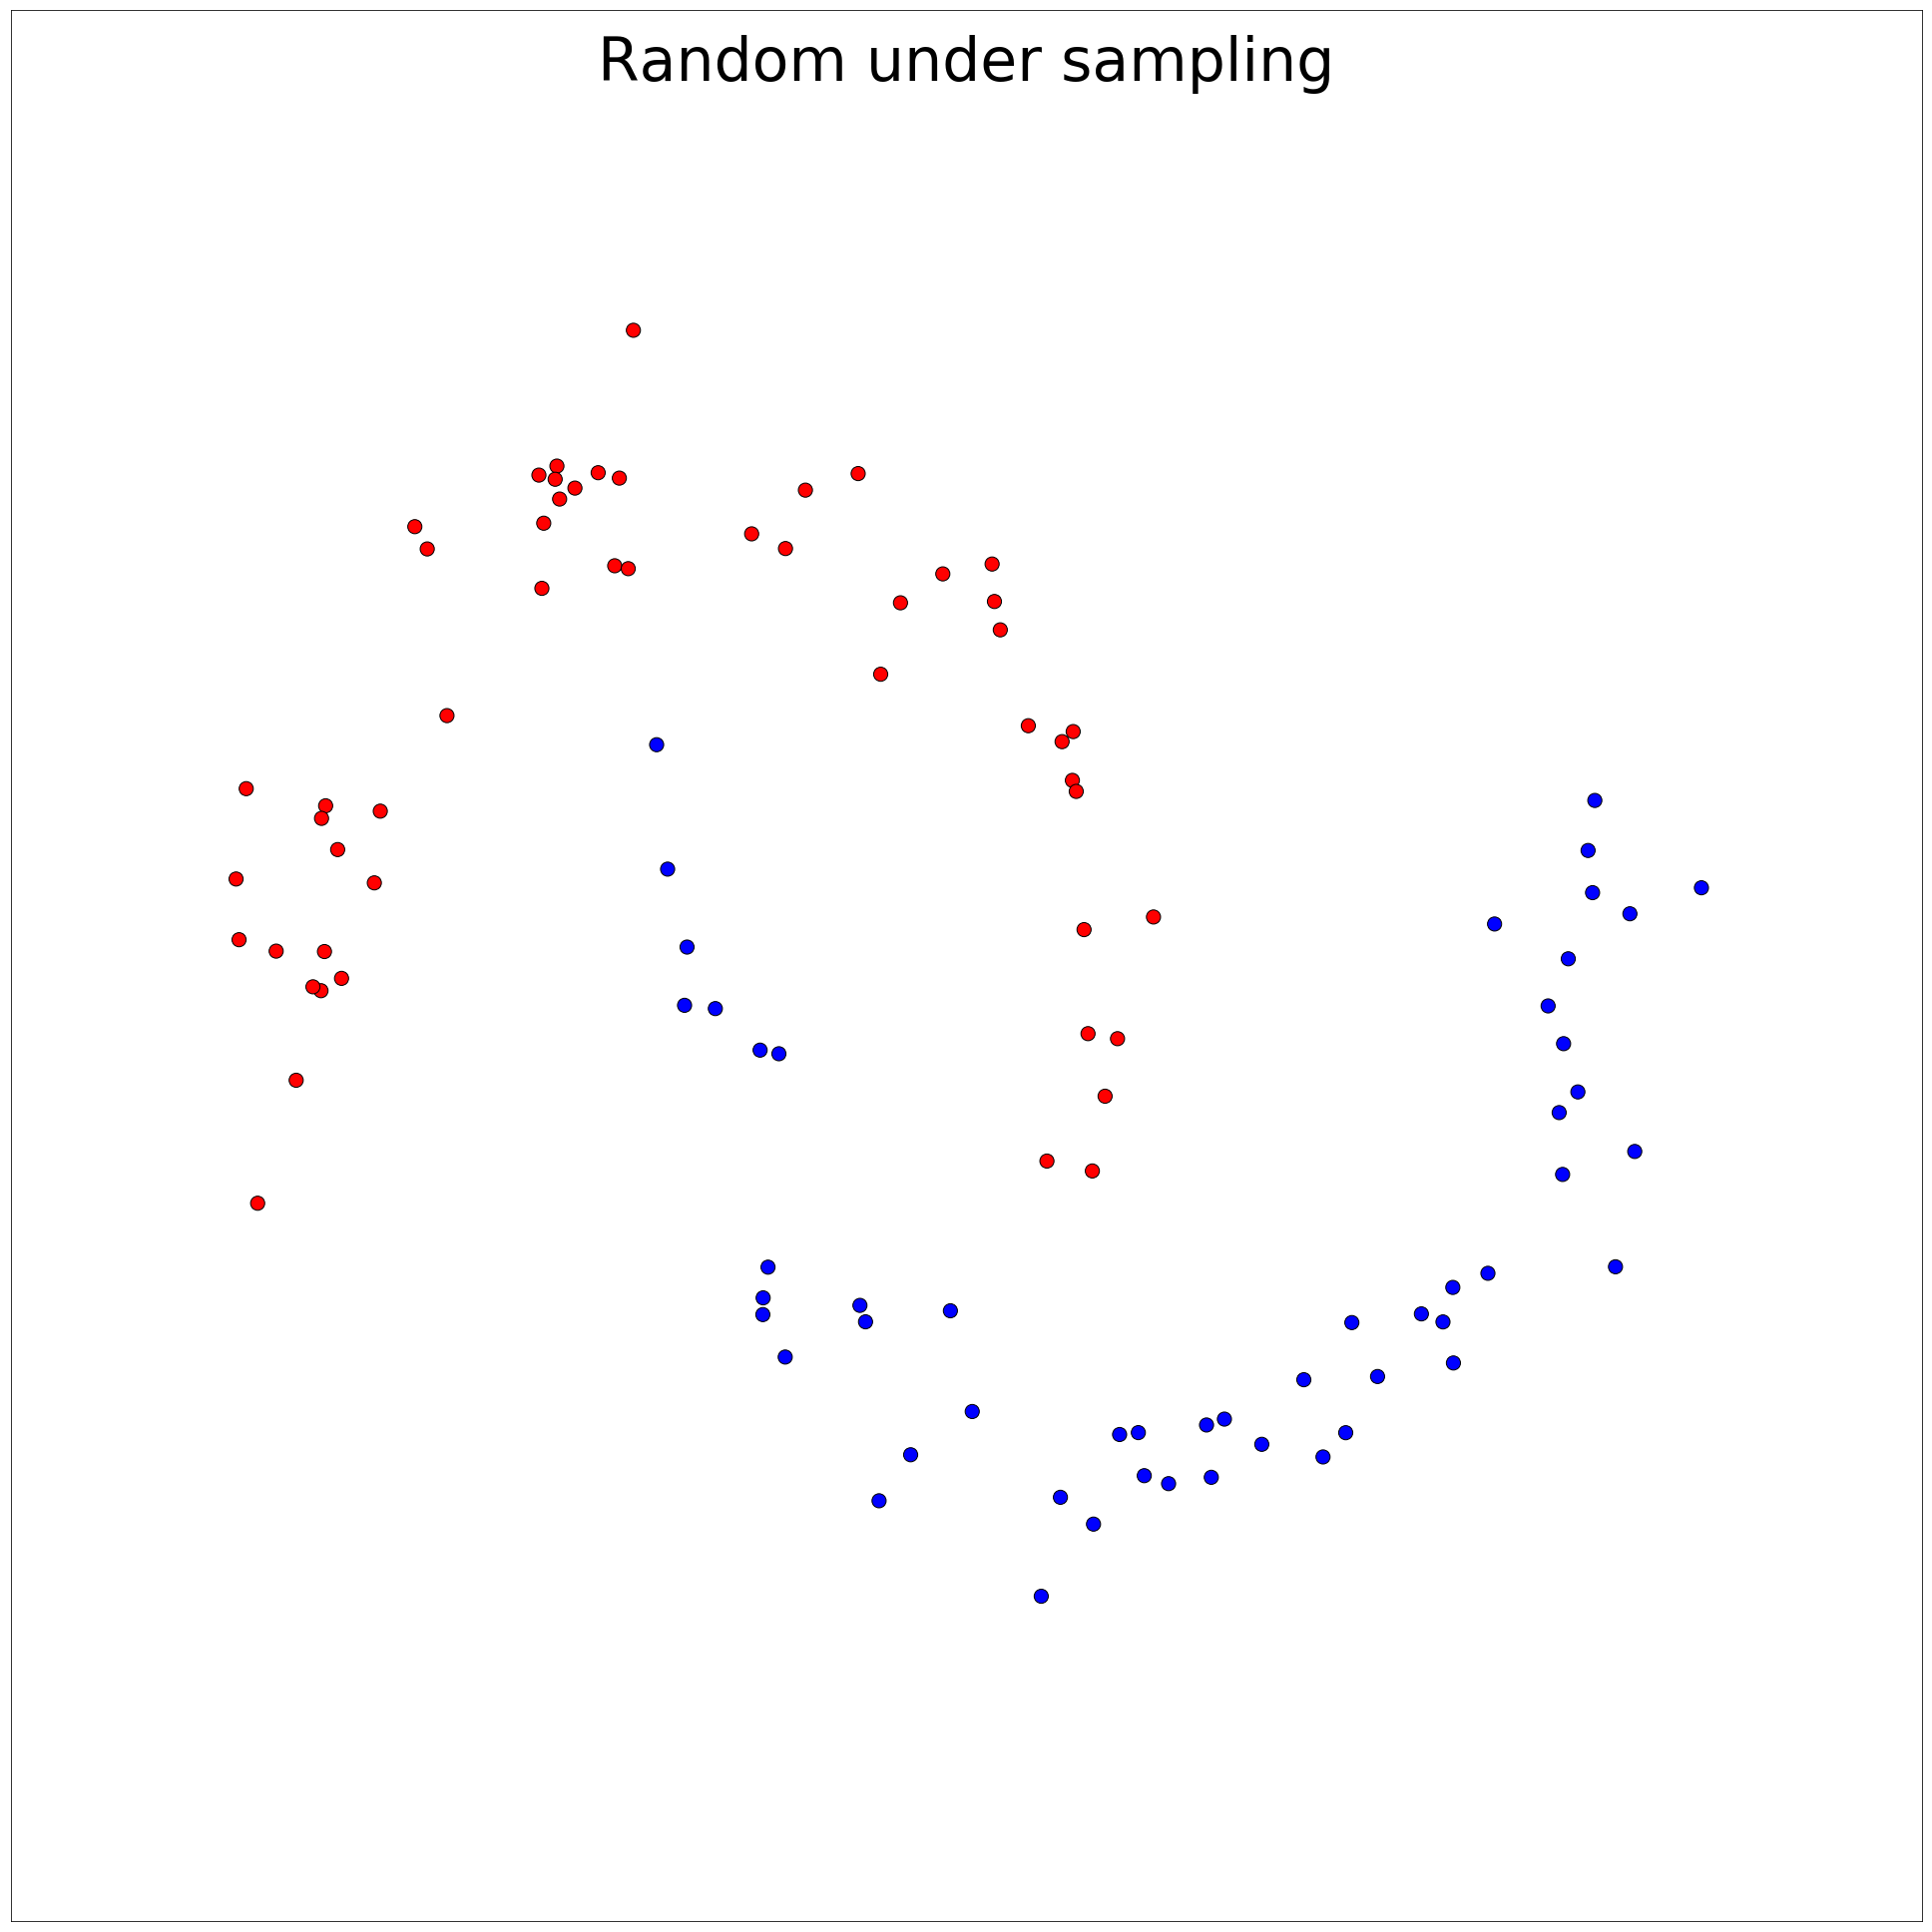

In [15]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
showScatter(X_rus, y_rus, title="Random under sampling", s=200)